<a href="https://colab.research.google.com/github/Homiez09/nlp-review-colab/blob/main/NLP_Dangue_ChatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
!pip install pythainlp
!pip install attacut
!pip install deepcut
!pip install dict_trie

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 48.9 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=7c5d62acee4fbb4a4b2305e27f29c48accbb4165f4841b69e257cbe76430a597
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=da6fea1d460fd1382bcb1f020810524e511bc2478c8c487ec979b342d18b57c1
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1D3se3oRoYUGQ7kGrz-t6IWRClsnNdsUC' -O Dangue.csv

--2023-10-17 05:06:49--  https://docs.google.com/uc?export=download&id=1D3se3oRoYUGQ7kGrz-t6IWRClsnNdsUC
Resolving docs.google.com (docs.google.com)... 172.217.204.139, 172.217.204.113, 172.217.204.101, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6ed55f7rbeq33sejssure0n62rvgjdlk/1697519175000/18446462546159961933/*/1D3se3oRoYUGQ7kGrz-t6IWRClsnNdsUC?e=download&uuid=fe673cc0-8147-4900-a2cd-2d3595b7e456 [following]
--2023-10-17 05:06:49--  https://doc-10-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6ed55f7rbeq33sejssure0n62rvgjdlk/1697519175000/18446462546159961933/*/1D3se3oRoYUGQ7kGrz-t6IWRClsnNdsUC?e=download&uuid=fe673cc0-8147-4900-a2cd-2d3595b7e456
Resolving doc-10-1k-docs.googleusercontent.com (doc-10-1k-docs.googleusercontent.com)... 74.125.139.132, 2607:f

In [ ]:
data = pd.read_csv("Dangue.csv")
data = data.drop(columns = 'label')
data['classes'] = pd.factorize(data['class'])[0]

In [ ]:
data

,data,class,classes
0,ไข้เลือดออกเกิดจากอะไร,สาเหตุ,0
1,ไข้เลือดออกพบในสภาพแวดล้อมใดเป็นส่วนใหญ่,สาเหตุ,0
2,ทำไมไข้เลือดออกถึงระบาดในช่วงฤดดูฝน,สาเหตุ,0
3,ไข้เลือดออกมีความสัมพันธ์กับเชื้อไวรัสอะไรบ้าง,สาเหตุ,0
4,ไวรหัสแดงกีคืออะไร,สาเหตุ,0
...,...,...,...
635,อะไรคือวิธีป้องกันที่ดีที่สุด,วิธีการป้องกันและปัจจัยเสี่ยง,7
636,อะไรคือสิ่งที่ควรหลีกเลี่ยง,วิธีการป้องกันและปัจจัยเสี่ยง,7
637,อาการแบบไหนที่เสี่ยง,วิธีการป้องกันและปัจจัยเสี่ยง,7
638,อากาศแบบไหนยุงเยอะ,วิธีการป้องกันและปัจจัยเสี่ยง,7


In [ ]:
data["class"].value_counts()

สาเหตุ                                           80
อาการและภาวะแทรกซ้อน                             80
ติดต่อจากคนสู่คนได้ไหม                           80
เคยป่วยไข้เลือดออกแล้วจะเป็นซ้ำได้อีกไหม         80
มีอาการเป็นไข้เลือดออกแล้วทำอย่างไร              80
เป็นไข้เลือดออกต้องรับประทานอาหารและยาอย่างไร    80
คำแนะนำในการฉีดวัคซีน                            80
วิธีการป้องกันและปัจจัยเสี่ยง                    80
Name: class, dtype: int64

## Data preprocessing

In [ ]:
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus.common import thai_words
from pythainlp.corpus import thai_stopwords
from pythainlp.util import dict_trie
from pythainlp.util import normalize
import re

X = data['data'].astype(str)
y = data['classes']

STOP_WORD = [" ", "\n","ไข้เลือดออก","คะ","คับ","ครับ","ต้อง","อะไร","อย่างไร","ไง","ไหม","บ้าง","มั้ย","การ","โรค","ได้","หรือ","ไม่","เป็น","แล้ว"]
FORMAT = r"[\u0E00-\u0E7Fa-zA-Z'0-9]+"

words = ["พาราเซตามอล", "แอสไพริน", "วัคซีน", "ยุงลาย", "แดงกี", "ไวรัส","DENV","denv" ]
custom_words_list = set(thai_words())
custom_words_list.update(words)
trie = dict_trie(dict_source=custom_words_list)

def tokenize(sentence):
  return word_tokenize(sentence, engine="newmm", custom_dict=trie,keep_whitespace=False)
def cleaning_stop_word(tk_list):
  return [word for word in tk_list if word not in STOP_WORD]

X_tokenized = X.apply(normalize)
X_tokenized = X_tokenized.apply(word_tokenize, custom_dict = trie, keep_whitespace=False,engine = "newmm")
X_tokenized = X_tokenized.apply(cleaning_stop_word)
X_tokenized

0                                   [เกิด, จาก]
1       [พบ, ใน, สภาพแวดล้อม, ใด, เป็นส่วนใหญ่]
2      [ทำไม, ถึง, ระบาด, ใน, ช่วง, ฤด, ดู, ฝน]
3           [มี, ความสัมพันธ์, กับ, เชื้อไวรัส]
4                        [ไว, รหัส, แดงกี, คือ]
                         ...                   
635       [คือ, วิธี, ป้อง, กันที่, ดี, ที่สุด]
636           [คือ, สิ่ง, ที่, ควร, หลีกเลี่ยง]
637              [อาการ, แบบ, ไหน, ที่, เสี่ยง]
638                [อากาศ, แบบ, ไหน, ยุง, เยอะ]
639     [อายุ, เท่าไหร่, มีสิทธิ์, มาก, ที่สุด]
Name: data, Length: 640, dtype: object

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_tokenized)
tokenizer.word_index

{'มี': 1,
 'อาการ': 2,
 'หรือไม่': 3,
 'ที่': 4,
 'ยังไง': 5,
 'ทำ': 6,
 'วัคซีน': 7,
 'สามารถ': 8,
 'จาก': 9,
 'จะ': 10,
 'ควร': 11,
 'ติดต่อ': 12,
 'เกิด': 13,
 'ครั้ง': 14,
 'ยา': 15,
 'ยุง': 16,
 'กิน': 17,
 'ติดโรค': 18,
 'ทาน': 19,
 'ป้องกัน': 20,
 'ของ': 21,
 'คน': 22,
 'ฉีดวัคซีน': 23,
 'ผ่าน': 24,
 'กัด': 25,
 'ดี': 26,
 'ใน': 27,
 'ซ้ำ': 28,
 'แดงกี': 29,
 'เริ่มต้น': 30,
 'อาหาร': 31,
 'กี่': 32,
 'สัตว์': 33,
 'ไหน': 34,
 'โดน': 35,
 'เลือด': 36,
 'ป่วย': 37,
 'ไวรัส': 38,
 'ติด': 39,
 'ผู้ป่วย': 40,
 'เสี่ยง': 41,
 'ทำไม': 42,
 'ไป': 43,
 'แบบ': 44,
 'เคย': 45,
 'สงสัย': 46,
 'หมอ': 47,
 'ฉีด': 48,
 'ไข้': 49,
 'และ': 50,
 'เป็นโรค': 51,
 'รับประทาน': 52,
 'สาเหตุ': 53,
 'ถึง': 54,
 'เรา': 55,
 'ออก': 56,
 'ยุงลาย': 57,
 '2': 58,
 'รอบ': 59,
 'พื้นที่': 60,
 'วิธี': 61,
 'อีก': 62,
 'เชื้อไวรัส': 63,
 'ระยะ': 64,
 'หมา': 65,
 'แมว': 66,
 'พบ': 67,
 'คือ': 68,
 'ประเภท': 69,
 'ภาวะ': 70,
 'เด็ก': 71,
 'เอง': 72,
 'เปน': 73,
 'กับ': 74,
 'เริ่ม': 75,
 'หาย': 76,
 'ภาวะแทรกซ้

In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from keras.utils import to_categorical
print("Unique lables = " , set(y))
y=to_categorical([ int(i) for i in y])
print(y)


Unique lables =  {0, 1, 2, 3, 4, 5, 6, 7}
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
from keras.utils import pad_sequences
tts = tokenizer.texts_to_sequences(X_tokenized)
print("Raw Texts to Sequence:")
for s in tts: print(s)
maxlen = max([len(s) for s in tts])
print("max sentense's length = " , maxlen)
x = pad_sequences(tts, maxlen=maxlen, padding="post")
print("Squence Padding at maxlen words, post padding:\n", x)

Raw Texts to Sequence:
[13, 9]
[67, 27, 267, 91, 268]
[42, 54, 92, 27, 269, 270, 170, 271]
[1, 171, 74, 63]
[172, 173, 29, 68]
[38, 29, 1, 272, 74, 5]
[38, 29, 1, 32, 69]
[69, 21, 38, 29, 1]
[273, 21]
[53, 21, 13, 274, 275]
[42, 13, 49, 36, 54, 93, 276, 110]
[42, 16, 25, 55]
[16, 174, 94, 111, 175, 27, 69, 4, 176]
[33, 8]
[42, 54, 93, 177, 110]
[8, 12, 9, 22, 95, 33, 3]
[1, 32, 94]
[69, 21, 277, 278, 36, 56]
[8, 1, 96, 178, 34]
[75, 92, 9, 112]
[179, 21, 113, 1, 114, 74]
[42, 54, 13, 9, 16]
[38, 279, 9, 1, 32, 44]
[49, 36, 115, 144, 13, 9, 16, 94, 34]
[63, 29, 8, 145, 9, 22, 43, 95, 22]
[38, 29, 280, 116, 27, 281, 69]
[53]
[13]
[38, 29, 13, 9]
[96]
[38, 29, 96]
[282, 21, 38, 29]
[180, 283, 284]
[42, 54, 39, 27, 285]
[42, 63, 54, 39, 27, 22]
[22, 8, 83, 181, 21, 9, 16]
[53]
[38, 29, 68]
[38, 29, 1, 32, 94]
[42, 54, 92, 27, 117]
[117, 74]
[182, 286, 104, 68]
[287, 21]
[182, 288, 84, 9]
[118, 57, 25, 33, 289, 33, 8, 13]
[16, 4, 1, 83, 21, 13, 9]
[42, 183, 35, 16, 25, 290, 291]
[53, 21, 18

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y ,random_state=42,)

In [ ]:
from sklearn.model_selection import train_test_split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5,stratify = y_test, random_state=42)

In [ ]:
print("All Training Data: " + str(len(y_train)))
print("All Validation Data: " + str(len(y_val)))
print("All Test Data: " + str(len(y_test)))

All Training Data: 448
All Validation Data: 96
All Test Data: 96


In [ ]:
print("=================== Training Data Per class ===================")
unique_values, counts = np.unique(np.argmax(y_train,axis=1), return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value {value} appears {count} times")

print("=================== Validation Data Per class ===================")
unique_values, counts = np.unique(np.argmax(y_val,axis=1), return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value {value} appears {count} times")

print("=================== Testing Data Per class ===================")
unique_values, counts = np.unique(np.argmax(y_test,axis=1), return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value {value} appears {count} times")

=================== Training Data Per class ===================
Value 0 appears 56 times
Value 1 appears 56 times
Value 2 appears 56 times
Value 3 appears 56 times
Value 4 appears 56 times
Value 5 appears 56 times
Value 6 appears 56 times
Value 7 appears 56 times
=================== Validation Data Per class ===================
Value 0 appears 12 times
Value 1 appears 12 times
Value 2 appears 12 times
Value 3 appears 12 times
Value 4 appears 12 times
Value 5 appears 12 times
Value 6 appears 12 times
Value 7 appears 12 times
=================== Testing Data Per class ===================
Value 0 appears 12 times
Value 1 appears 12 times
Value 2 appears 12 times
Value 3 appears 12 times
Value 4 appears 12 times
Value 5 appears 12 times
Value 6 appears 12 times
Value 7 appears 12 times


## CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

vocab_size = 10000

np.random.seed(7)
modelCNN = Sequential()
modelCNN.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen))
modelCNN.add(Flatten())
modelCNN.add(Dense(len(np.unique(data["classes"])) * 4, activation='relu'))
modelCNN.add(Dropout(0.2))
modelCNN.add(Dense(len(np.unique(data["classes"])) * 2, activation='relu'))
modelCNN.add(Dropout(0.2))
modelCNN.add(Dense(len(np.unique(data["classes"])), activation='softmax'))



optimizer = Adam(learning_rate=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

modelCNN.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
modelCNN.summary()


history = modelCNN.fit(X_train,y_train,validation_data = (X_val,y_val) ,epochs=600,batch_size=64,verbose=1,callbacks = [early_stopping])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 64)            640000    
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 32)                32800     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 1

In [ ]:
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")


Training Accuracy: 0.9509
Validation Accuracy: 0.9062
Training Loss: 0.1839
Validation Loss: 0.3167


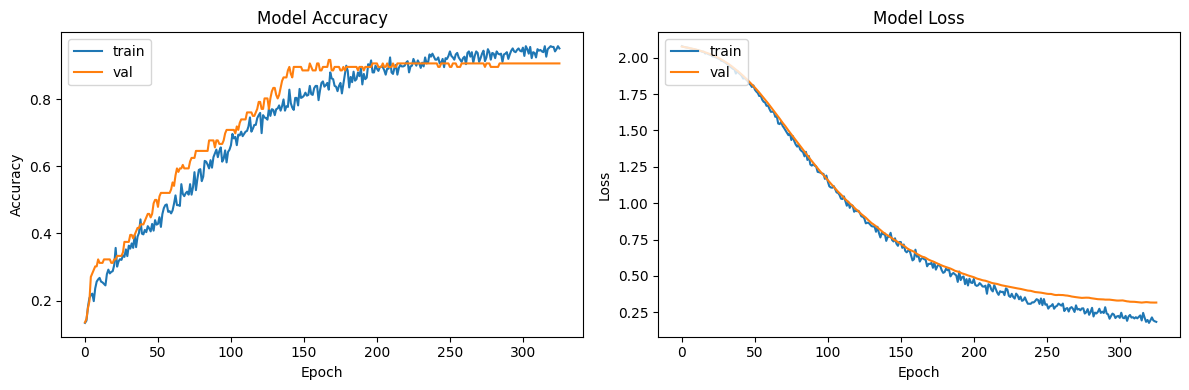

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(history.history['accuracy'], label='train')
axes[0].plot(history.history['val_accuracy'], label='val')
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(loc='upper left')


axes[1].plot(history.history['loss'], label='train')
axes[1].plot(history.history['val_loss'], label='val')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

3/3 [==============================] - 0s 4ms/step
Normalized confusion matrix


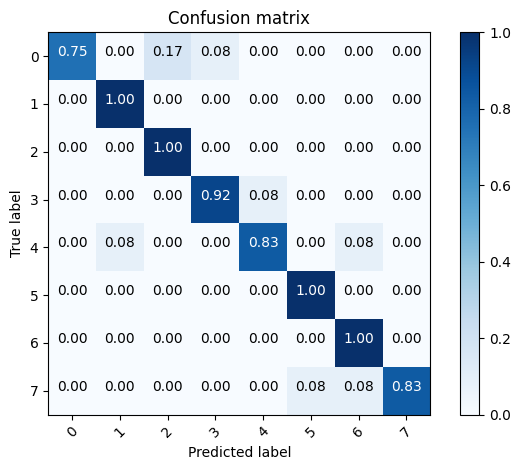

In [ ]:
y_predict = modelCNN.predict(X_test)

y_t=[ np.argmax(i) for i in y_test]
y_p=[ np.argmax(i) for i in y_predict]

cm=confusion_matrix(y_t, y_p)
plot_confusion_matrix(cm=cm, classes=list(np.unique(data["classes"])), normalize=True)

In [ ]:
list(data["class"].unique())

['สาเหตุ',
 'อาการและภาวะแทรกซ้อน',
 'ติดต่อจากคนสู่คนได้ไหม ',
 'เคยป่วยไข้เลือดออกแล้วจะเป็นซ้ำได้อีกไหม',
 'มีอาการเป็นไข้เลือดออกแล้วทำอย่างไร',
 'เป็นไข้เลือดออกต้องรับประทานอาหารและยาอย่างไร',
 'คำแนะนำในการฉีดวัคซีน',
 'วิธีการป้องกันและปัจจัยเสี่ยง']

In [ ]:
from sklearn.metrics import classification_report

eval_results = modelCNN.evaluate(X_test, y_test, verbose=1)
print(f'Accuracy: {eval_results[1]}')
print(f'Loss: {eval_results[0]}')


y_predict = modelCNN.predict(X_test)
true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(y_predict, axis=1)
report = classification_report(true_labels, predicted_labels)
print(report)

3/3 [==============================] - 0s 5ms/step - loss: 0.4388 - accuracy: 0.9167
Accuracy: 0.9166666865348816
Loss: 0.4388042986392975
3/3 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.92      1.00      0.96        12
           2       0.86      1.00      0.92        12
           3       0.92      0.92      0.92        12
           4       0.91      0.83      0.87        12
           5       0.92      1.00      0.96        12
           6       0.86      1.00      0.92        12
           7       1.00      0.83      0.91        12

    accuracy                           0.92        96
   macro avg       0.92      0.92      0.91        96
weighted avg       0.92      0.92      0.91        96



## RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN, Dropout
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

vocab_size = 10000

np.random.seed(7)
modelRNN = Sequential()
modelRNN.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen))
modelRNN.add(SimpleRNN(20))
modelRNN.add(Dense(len(np.unique(data["classes"])) * 2, activation='relu'))
modelRNN.add(Dense(len(np.unique(data["classes"])), activation='softmax'))



optimizer = Adam(learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

modelRNN.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
modelRNN.summary()


history = modelRNN.fit(X_train,y_train,validation_data = (X_val,y_val) ,epochs=300,batch_size=64,verbose=1,callbacks = [early_stopping])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 16, 64)            640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 20)                1700      
                                                                 
 dense_3 (Dense)             (None, 16)                336       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
Total params: 642172 (2.45 MB)
Trainable params: 642172 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
7/7 [==============================] - 2s 65ms/step - loss: 2.0703 - accuracy: 0.1228 - val_loss: 2.0561 - val_accuracy: 0.1771
Epoch 2/30

In [ ]:
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")


Training Accuracy: 0.9978
Validation Accuracy: 0.8021
Training Loss: 0.0378
Validation Loss: 0.8044


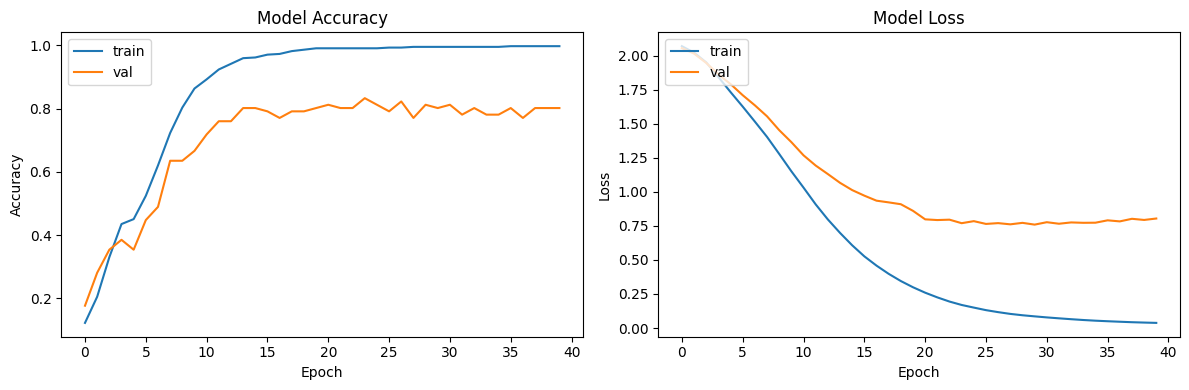

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(history.history['accuracy'], label='train')
axes[0].plot(history.history['val_accuracy'], label='val')
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(loc='upper left')


axes[1].plot(history.history['loss'], label='train')
axes[1].plot(history.history['val_loss'], label='val')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

3/3 [==============================] - 0s 5ms/step
Normalized confusion matrix


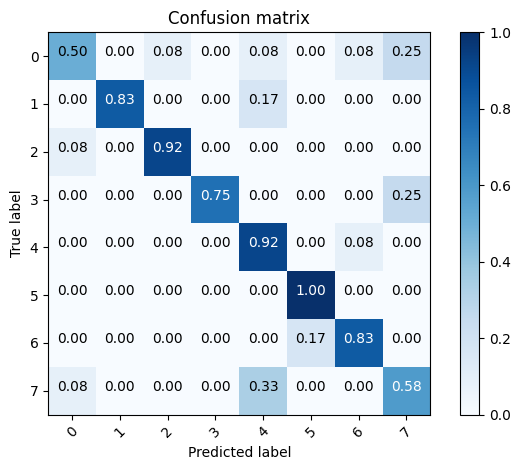

In [ ]:
y_predict = modelRNN.predict(X_test)

y_t=[ np.argmax(i) for i in y_test]
y_p=[ np.argmax(i) for i in y_predict]

cm=confusion_matrix(y_t, y_p)
plot_confusion_matrix(cm=cm, classes=list(np.unique(data["classes"])), normalize=True)

In [ ]:
from sklearn.metrics import classification_report

eval_results = modelRNN.evaluate(X_test, y_test, verbose=1)
print(f'Accuracy: {eval_results[1]}')
print(f'Loss: {eval_results[0]}')


y_predict = modelRNN.predict(X_test)
true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(y_predict, axis=1)
report = classification_report(true_labels, predicted_labels)
print(report)

3/3 [==============================] - 0s 6ms/step - loss: 0.7243 - accuracy: 0.7917
Accuracy: 0.7916666865348816
Loss: 0.7242555022239685
3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       1.00      0.83      0.91        12
           2       0.92      0.92      0.92        12
           3       1.00      0.75      0.86        12
           4       0.61      0.92      0.73        12
           5       0.86      1.00      0.92        12
           6       0.83      0.83      0.83        12
           7       0.54      0.58      0.56        12

    accuracy                           0.79        96
   macro avg       0.81      0.79      0.79        96
weighted avg       0.81      0.79      0.79        96



In [ ]:
list(data["class"].unique())

['สาเหตุ',
 'อาการและภาวะแทรกซ้อน',
 'ติดต่อจากคนสู่คนได้ไหม ',
 'เคยป่วยไข้เลือดออกแล้วจะเป็นซ้ำได้อีกไหม',
 'มีอาการเป็นไข้เลือดออกแล้วทำอย่างไร',
 'เป็นไข้เลือดออกต้องรับประทานอาหารและยาอย่างไร',
 'คำแนะนำในการฉีดวัคซีน',
 'วิธีการป้องกันและปัจจัยเสี่ยง']

## LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM,Bidirectional, Dropout
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

vocab_size = 10000

np.random.seed(7)
modelLSTM = Sequential()
modelLSTM.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen))
modelLSTM.add(LSTM(20,dropout = 0.2, recurrent_dropout=0.2,return_sequences = True))
modelLSTM.add(LSTM(10,dropout = 0.2, recurrent_dropout=0.2,return_sequences = False))
modelLSTM.add(Dense(len(np.unique(data["classes"])), activation='softmax'))



optimizer = Adam(learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

modelLSTM.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
modelLSTM.summary()


history = modelLSTM.fit(X_train,y_train,validation_data = (X_val,y_val) ,epochs=300,batch_size=64,verbose=1,callbacks = [early_stopping])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 16, 64)            640000    
                                                                 
 lstm (LSTM)                 (None, 16, 20)            6800      
                                                                 
 lstm_1 (LSTM)               (None, 10)                1240      
                                                                 
 dense_5 (Dense)             (None, 8)                 88        
                                                                 
Total params: 648128 (2.47 MB)
Trainable params: 648128 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
7/7 [==============================] - 5s 140ms/step - loss: 2.0797 - accuracy: 0.1228 - val_loss: 2.0779 - val_accuracy: 0.1250
Epoch 2/3

In [ ]:
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")


Training Accuracy: 0.9955
Validation Accuracy: 0.8750
Training Loss: 0.1248
Validation Loss: 0.5341


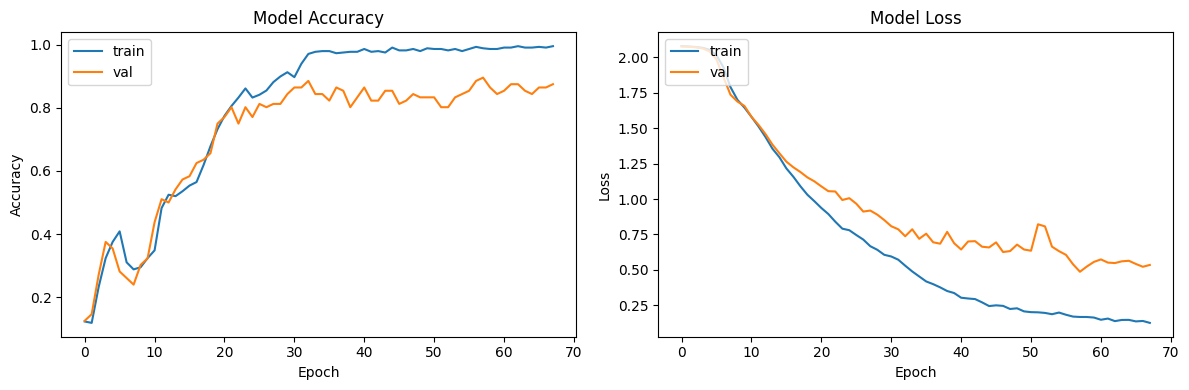

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(history.history['accuracy'], label='train')
axes[0].plot(history.history['val_accuracy'], label='val')
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(loc='upper left')


axes[1].plot(history.history['loss'], label='train')
axes[1].plot(history.history['val_loss'], label='val')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

3/3 [==============================] - 0s 7ms/step
Normalized confusion matrix


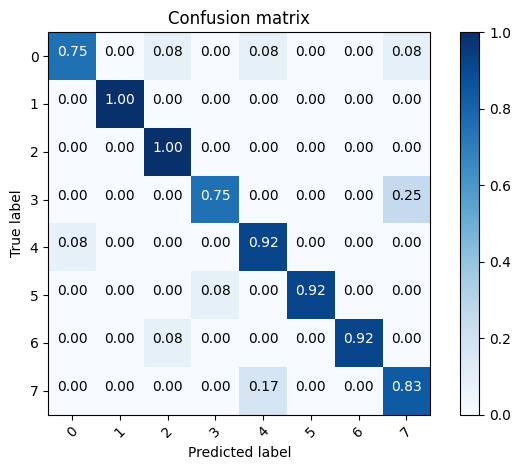

In [ ]:
y_predict = modelLSTM.predict(X_test)

y_t=[ np.argmax(i) for i in y_test]
y_p=[ np.argmax(i) for i in y_predict]

cm=confusion_matrix(y_t, y_p)
plot_confusion_matrix(cm=cm, classes=list(np.unique(data["classes"])), normalize=True)

In [ ]:
from sklearn.metrics import classification_report

eval_results = modelLSTM.evaluate(X_test, y_test, verbose=1)
print(f'Accuracy: {eval_results[1]}')
print(f'Loss: {eval_results[0]}')


y_predict = modelLSTM.predict(X_test)
true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(y_predict, axis=1)
report = classification_report(true_labels, predicted_labels)
print(report)

3/3 [==============================] - 0s 8ms/step - loss: 0.3550 - accuracy: 0.8854
Accuracy: 0.8854166865348816
Loss: 0.35496315360069275
3/3 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       1.00      1.00      1.00        12
           2       0.86      1.00      0.92        12
           3       0.90      0.75      0.82        12
           4       0.79      0.92      0.85        12
           5       1.00      0.92      0.96        12
           6       1.00      0.92      0.96        12
           7       0.71      0.83      0.77        12

    accuracy                           0.89        96
   macro avg       0.89      0.89      0.89        96
weighted avg       0.89      0.89      0.89        96



In [ ]:
list(data["class"].unique())

['สาเหตุ',
 'อาการและภาวะแทรกซ้อน',
 'ติดต่อจากคนสู่คนได้ไหม ',
 'เคยป่วยไข้เลือดออกแล้วจะเป็นซ้ำได้อีกไหม',
 'มีอาการเป็นไข้เลือดออกแล้วทำอย่างไร',
 'เป็นไข้เลือดออกต้องรับประทานอาหารและยาอย่างไร',
 'คำแนะนำในการฉีดวัคซีน',
 'วิธีการป้องกันและปัจจัยเสี่ยง']

## Bi-Directional LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM,Bidirectional, Dropout
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

vocab_size = 10000

np.random.seed(7)
modelLSTM = Sequential()
modelLSTM.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen))
modelLSTM.add(Bidirectional(LSTM(20,dropout = 0.2, recurrent_dropout=0.2,return_sequences = True)))
modelLSTM.add(Bidirectional(LSTM(10,dropout = 0.2, recurrent_dropout=0.2,return_sequences = False)))
modelLSTM.add(Dense(len(np.unique(data["classes"])), activation='softmax'))



optimizer = Adam(learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

modelLSTM.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
modelLSTM.summary()


history = modelLSTM.fit(X_train,y_train,validation_data = (X_val,y_val) ,epochs=300,batch_size=64,verbose=1,callbacks = [early_stopping])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 16, 64)            640000    
                                                                 
 bidirectional (Bidirection  (None, 16, 40)            13600     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 20)                4080      
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 8)                 168       
                                                                 
Total params: 657848 (2.51 MB)
Trainable params: 657848 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
7/7 [=

In [ ]:
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")


Training Accuracy: 1.0000
Validation Accuracy: 0.9167
Training Loss: 0.0329
Validation Loss: 0.4720


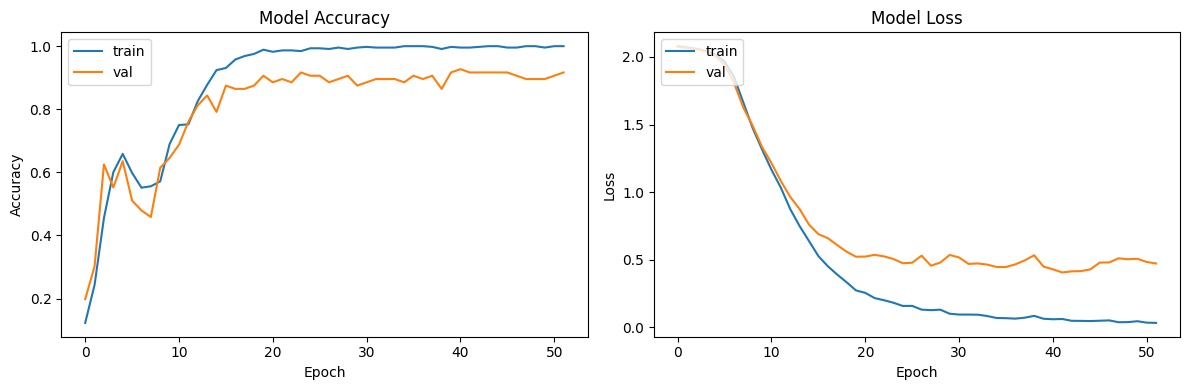

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(history.history['accuracy'], label='train')
axes[0].plot(history.history['val_accuracy'], label='val')
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(loc='upper left')


axes[1].plot(history.history['loss'], label='train')
axes[1].plot(history.history['val_loss'], label='val')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

3/3 [==============================] - 1s 11ms/step
Normalized confusion matrix


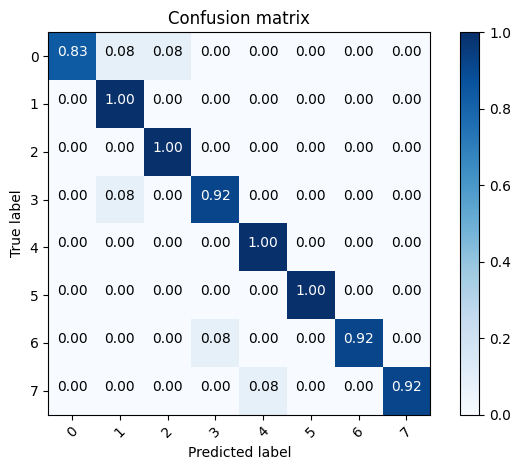

In [ ]:
y_predict = modelLSTM.predict(X_test)

y_t=[ np.argmax(i) for i in y_test]
y_p=[ np.argmax(i) for i in y_predict]

cm=confusion_matrix(y_t, y_p)
plot_confusion_matrix(cm=cm, classes=list(np.unique(data["classes"])), normalize=True)

In [ ]:
from sklearn.metrics import classification_report

eval_results = modelLSTM.evaluate(X_test, y_test, verbose=1)
print(f'Accuracy: {eval_results[1]}')
print(f'Loss: {eval_results[0]}')


y_predict = modelLSTM.predict(X_test)
true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(y_predict, axis=1)
report = classification_report(true_labels, predicted_labels)
print(report)

3/3 [==============================] - 0s 12ms/step - loss: 0.2576 - accuracy: 0.9479
Accuracy: 0.9479166865348816
Loss: 0.2576376497745514
3/3 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.86      1.00      0.92        12
           2       0.92      1.00      0.96        12
           3       0.92      0.92      0.92        12
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00        12
           6       1.00      0.92      0.96        12
           7       1.00      0.92      0.96        12

    accuracy                           0.95        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.95      0.95      0.95        96



In [ ]:
list(data["class"].unique())

['สาเหตุ',
 'อาการและภาวะแทรกซ้อน',
 'ติดต่อจากคนสู่คนได้ไหม ',
 'เคยป่วยไข้เลือดออกแล้วจะเป็นซ้ำได้อีกไหม',
 'มีอาการเป็นไข้เลือดออกแล้วทำอย่างไร',
 'เป็นไข้เลือดออกต้องรับประทานอาหารและยาอย่างไร',
 'คำแนะนำในการฉีดวัคซีน',
 'วิธีการป้องกันและปัจจัยเสี่ยง']

## load model

In [ ]:
label = ['สาเหตุ',
 'อาการและภาวะแทรกซ้อน',
 'ติดต่อจากคนสู่คนได้ไหม ',
 'เคยป่วยไข้เลือดออกแล้วจะเป็นซ้ำได้อีกไหม',
 'มีอาการเป็นไข้เลือดออกแล้วทำอย่างไร',
 'เป็นไข้เลือดออกต้องรับประทานอาหารและยาอย่างไร',
 'คำแนะนำในการฉีดวัคซีน',
 'วิธีการป้องกันและปัจจัยเสี่ยง']

In [ ]:
model = modelCNN
model.save("dangue_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
load = load_model("dangue_model.h5")

In [ ]:
from keras.utils import pad_sequences
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus.common import thai_words
from keras.preprocessing.text import Tokenizer
import pickle
from keras.preprocessing.text import Tokenizer

# Word Tokenized
STOP_WORD = [" ", "\n","ไข้เลือดออก","คะ","คับ","ครับ","ต้อง","อะไร","อย่างไร","ไง","ไหม","บ้าง","มั้ย","การ","โรค","ได้","หรือ","ไม่","เป็น","แล้ว"]
FORMAT = r"[\u0E00-\u0E7Fa-zA-Z'0-9]+"

words = ["พาราเซตามอล", "แอสไพริน", "วัคซีน", "ยุงลาย", "แดงกี", "ไวรัส","DENV","denv" ]
custom_words_list = set(thai_words())
custom_words_list.update(words)
trie = dict_trie(dict_source=custom_words_list)

def tokenize(sentence):
  return word_tokenize(sentence, engine="newmm", custom_dict=trie,keep_whitespace=False)
def cleaning_stop_word(tk_list):
  return [word for word in tk_list if word not in STOP_WORD]

text = "วิธีป้องกันไข้เลือดออกใส่แขนยาวได้ปะ"
text = pd.Series(text)
X_tokenized = text.apply(normalize)
X_tokenized = X_tokenized.apply(word_tokenize, custom_dict = trie, keep_whitespace=False,engine = "newmm")
X_tokenized = X_tokenized.apply(cleaning_stop_word)


#Embedding
# Load the Tokenizer from a file
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
x = tokenizer.texts_to_sequences(X_tokenized)
x = pad_sequences(x, padding="post", maxlen=16)
print(maxlen)

#Predict
results = load.predict(x)
predicted_percentage = np.max(results)  # Get the maximum probability from the prediction

if predicted_percentage >= 0.2:
    label_index = np.argmax(results)
    print(label[label_index])
else:
    print("unknown")
print(X_tokenized)

# Print the index with the maximum probability
print(results)
print("Index with Maximum Probability:", np.argmax(results))

16
1/1 [==============================] - 1s 998ms/step
วิธีการป้องกันและปัจจัยเสี่ยง
0    [วิธี, ป้องกัน, ใส่, แขน, ยาว, ปะ]
dtype: object
[[2.3062810e-02 2.9485588e-04 1.1250424e-03 1.6441999e-04 2.4506059e-03
  5.7765940e-04 2.5895727e-03 9.6973497e-01]]
Index with Maximum Probability: 7
